In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/dataset_cleaned.csv')

# extract all columns except 'goal' --> X
X = df.loc[:, df.columns != 'goal']
# extract only the column 'goal' --> y
y = df.loc[:, 'goal']

male=1
female=0

df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  goal  
0  0.0   6.0     0  
1  3.0   3.0     2  
2  2.0   7.0     1  
3  0.0   3.0     0  
4  0.0   3.0     0

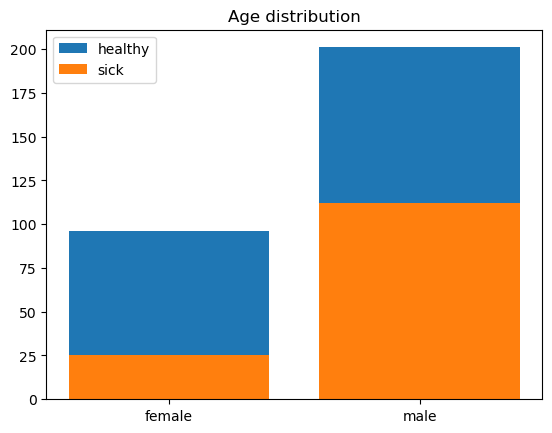

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

counts_male = sum(X['sex'] == male)
counts_female = sum(X['sex'] == female)

counts_male_sick = sum(np.all([X['sex'] == male,
                              y > 0], axis=0))
counts_female_sick = sum(np.all([X['sex'] == female,
                              y > 0], axis=0))

plt.bar([male, female], [counts_male, counts_female])
plt.bar([male, female], [counts_male_sick, counts_female_sick])
plt.xticks([male, female],['male', 'female'])
plt.title('Age distribution')
plt.legend(['healthy', 'sick'])
plt.show()

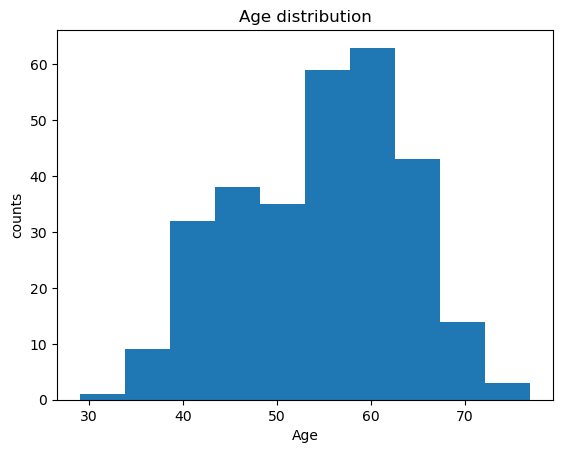

In [3]:
plt.hist(X['age'])
plt.xlabel('Age')
plt.ylabel('counts')
plt.title('Age distribution')
plt.show()

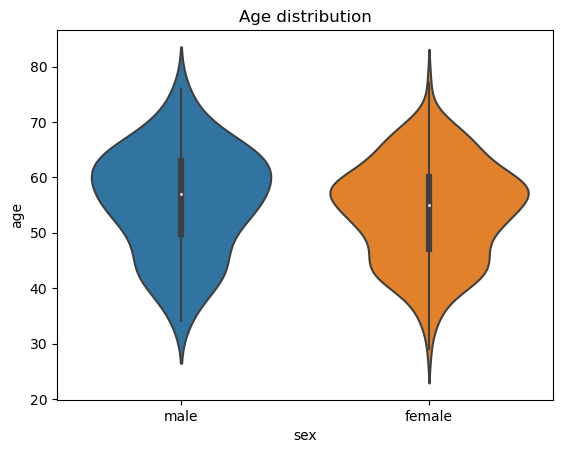

In [4]:
ax = sns.violinplot(X, x='sex', y='age')
ax.set_xticklabels(['male', 'female'])
plt.title('Age distribution')
plt.show()

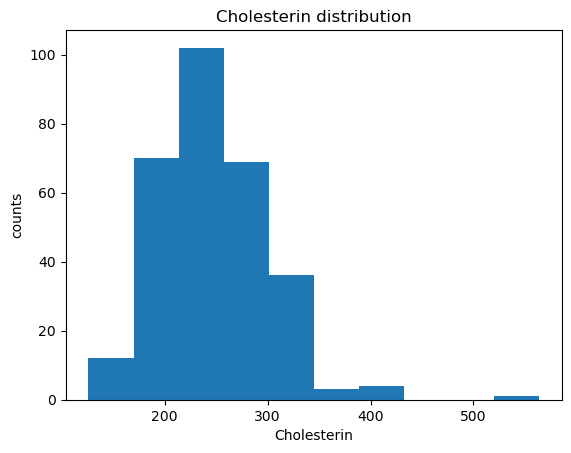

In [5]:
ax = plt.hist(X['chol'])
plt.xlabel('Cholesterin')
plt.ylabel('counts')
plt.title('Cholesterin distribution')
plt.show()

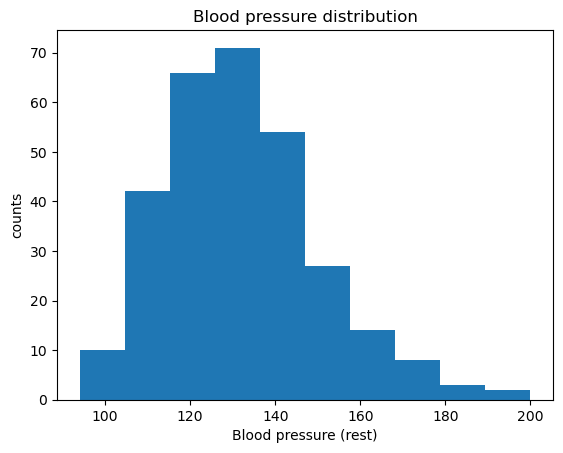

In [6]:
plt.hist(X['trestbps'])
plt.xlabel('Blood pressure (rest)')
plt.ylabel('counts')
plt.title('Blood pressure distribution')
plt.show()

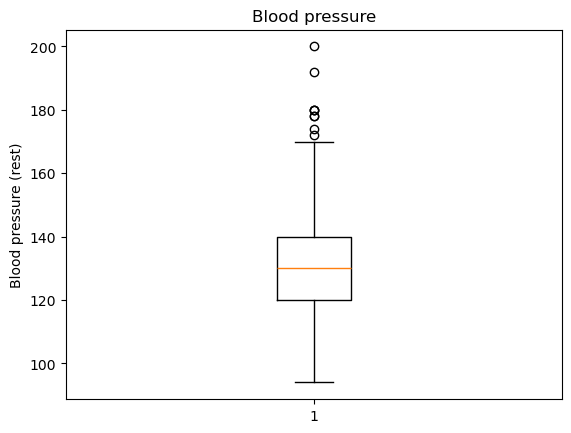

In [7]:
plt.boxplot(X['trestbps'])
plt.ylabel('Blood pressure (rest)')
plt.title('Blood pressure')
plt.show()

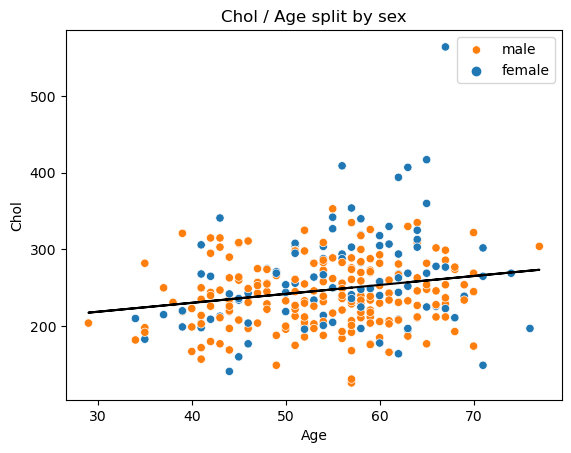

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = np.array(X['age'])
x = x[:, np.newaxis]
reg = model.fit(x, X['chol'])
pred = reg.predict(x)

sick = y != 0

sns.scatterplot(X, x='age', y='chol', hue='sex')
plt.plot(x, pred, color='black')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.title('Chol / Age split by sex')
plt.legend(['male', 'female'])
plt.show()

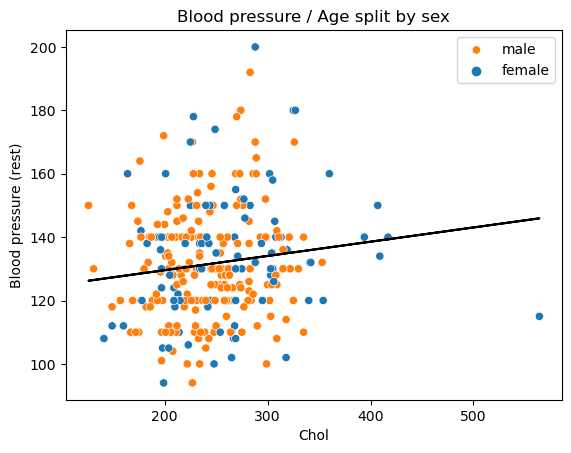

In [9]:
model = LinearRegression()
x = np.array(X['chol'])
x = x[:, np.newaxis]
reg = model.fit(x, X['trestbps'])
pred = reg.predict(x)

sick = y != 0

sns.scatterplot(X, x='chol', y='trestbps', hue='sex')
plt.plot(x, pred, color='black')
plt.xlabel('Chol')
plt.ylabel('Blood pressure (rest)')
plt.title('Blood pressure / Age split by sex')
plt.legend(['male', 'female'])
plt.show()

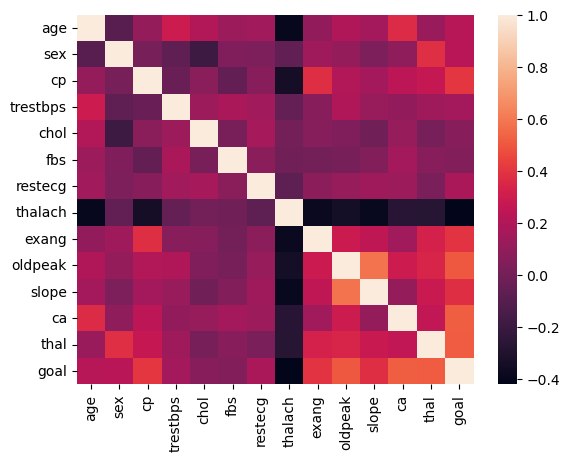

In [10]:
corr = df.corr()

sns.heatmap(corr)
plt.show()